## WikiArtVectors - Color Aggregation and Analysis

In this notebook we will aggregate the color vectors for paintings by artist, style, and genre by year and do some basic explorations.

### Imports and Data

In [ ]:
import pandas as pd

In [12]:
import numpy as np

In [3]:
color_df = pd.read_feather("color_embedding.feather")

In [4]:
color_df = color_df[color_df['date'].notnull()]

In [5]:
color_df.replace(0, 0.000001, inplace=True)

In [6]:
color_df

,color_embedding1,color_embedding2,color_embedding3,color_embedding4,color_embedding5,color_embedding6,color_embedding7,color_embedding8,artist,date,genre,style,title,new_filename
0,1.487098,377.844440,0.018706,143.500266,0.046764,303.555017,0.009353,15.291855,John French Sloan,1920,cityscape,New Realism,Cornelia Street,0.jpg
1,0.000001,664.406105,0.000001,0.000001,0.000001,177.347394,0.000001,0.000001,M.C. Escher,1918,flower painting,Expressionism,Sunflowers,1.jpg
3,13.346469,444.090440,0.018706,224.140251,0.000001,87.645245,0.000001,72.512388,Nikola Tanev,1932,landscape,Post-Impressionism,Red House - Karlovo,100.jpg
4,29.274316,325.496725,1.739624,127.843651,104.143613,204.106518,20.594902,28.554149,Vasily Polenov,1903,landscape,Realism,Oka. Evening.,1000.jpg
5,8.454946,634.859842,0.000001,198.401300,0.000001,0.037411,0.000001,0.000001,Kiyoshi Saito,1947,portrait,S_saku hanga,Profile of Brown Haired Woman,10000.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,0.000001,310.878273,0.000001,142.003815,0.000001,287.496231,0.000001,101.375180,Charles Turner,1819,portrait,Romanticism,James Gillray,99991.jpg
103242,7.931277,254.764204,0.000001,271.159873,0.000001,218.587107,0.000001,89.311039,Sir Lawrence Alma-Tadema,1871,genre painting,Romanticism,From An Absent One,99992.jpg
103243,0.000001,11.046290,0.000001,4.190295,0.000001,807.258395,0.000001,19.258519,Taras Shevchenko,1845,landscape,Romanticism,In Gustynia. Refectory church.,99993.jpg
103247,0.000001,574.646408,0.000001,214.432027,0.000001,1.655449,0.000001,51.019615,Paul Cezanne,1868,portrait,Romanticism,Portrait of Achille Emperaire,99997.jpg


In [82]:
color_df.loc[(color_df['artist'] == 'Pablo Picasso') & (color_df['date'] == '1902')]

,color_embedding1,color_embedding2,color_embedding3,color_embedding4,color_embedding5,color_embedding6,color_embedding7,color_embedding8,artist,date,genre,style,title,new_filename
3904,25.074901,383.166193,6.303798,205.125975,0.523758,149.579597,0.000001,71.979277,Pablo Picasso,1902,genre painting,Post-Impressionism,Mother and son on the shore,10586.jpg
48181,462.652498,195.751625,0.000001,0.523775,83.177371,99.246046,0.000001,0.402185,Pablo Picasso,1902,genre painting,Symbolism,Mother and child,50435.jpg
53906,1.103632,302.011803,0.495699,492.566089,0.000001,12.383129,0.000001,33.193146,Pablo Picasso,1902,portrait,Expressionism,Woman in blue,55589.jpg
56305,0.000001,0.093528,0.000001,0.009353,0.000001,840.958509,0.000001,0.692108,Pablo Picasso,1902,sketch and study,Expressionism,"Study to ""Two sisters""",57748.jpg
76573,546.921384,176.498964,0.065470,0.626646,63.450213,54.190822,0.000001,0.000001,Pablo Picasso,1902,genre painting,Symbolism,Crouching woman,7599.jpg
83894,48.896525,473.495696,0.009353,24.485674,34.025547,260.438533,0.000001,0.402171,Pablo Picasso,1902,genre painting,Symbolism,Mother and child on the beach,82578.jpg
84721,575.871627,168.921222,2.880668,13.243588,44.238823,35.606173,0.000001,0.991399,Pablo Picasso,1902,portrait,Expressionism,Woman in a shawl,83321.jpg
96509,165.928320,590.293670,0.000001,0.037411,22.605758,62.233642,0.000001,0.654697,Pablo Picasso,1902,genre painting,Symbolism,Two women sitting at a bar,93931.jpg


### Aggregation

In [7]:
artist_color_embeddings = {}

In [8]:
genre_color_embeddings = {}

In [9]:
style_color_embeddings = {}

In [10]:
artwork_embeddings = {}

In [13]:
for i, row in color_df.iterrows():
    color_vec = np.array([row['color_embedding1'], row['color_embedding2'], row['color_embedding3'], row['color_embedding4'], 
                          row['color_embedding5'], row['color_embedding6'], row['color_embedding7'], row['color_embedding8']])
    if np.isnan(color_vec).any():
        continue
    
    year = row['date']
    artist = row['artist']
    genre = row['genre']
    style = row['style']
    title = row['title']
    
    artwork_embeddings[(title, artist, year)] = color_vec
    
    if (artist, year) not in artist_color_embeddings:
        artist_color_embeddings[(artist, year)] = []
    if (artist, year) in artist_color_embeddings:
        artist_color_embeddings[(artist, year)].append(color_vec)
    
    if (genre, year) not in genre_color_embeddings:
        genre_color_embeddings[(genre, year)] = []
    if (genre, year) in genre_color_embeddings:
        genre_color_embeddings[(genre, year)].append(color_vec)
        
    if (style, year) not in style_color_embeddings:
        style_color_embeddings[(style, year)] = []
    if (style, year) in style_color_embeddings:
        style_color_embeddings[(style, year)].append(color_vec)

In [17]:
artist_color_embeddings[('John French Sloan', '1920')]

[array([1.48709785e+00, 3.77844440e+02, 1.87056333e-02, 1.43500266e+02,
        4.67640833e-02, 3.03555017e+02, 9.35281665e-03, 1.52918552e+01]),
 array([205.72058506,  11.62409614, 119.77330442, 168.23743441,
         63.24621757,  61.45124979,   1.64138765, 210.05922375])]

In [16]:
artwork_embeddings[('Cornelia Street', 'John French Sloan', '1920')]

array([1.48709785e+00, 3.77844440e+02, 1.87056333e-02, 1.43500266e+02,
       4.67640833e-02, 3.03555017e+02, 9.35281665e-03, 1.52918552e+01])

In [31]:
import scipy.stats

### Calculating Averages and Entropy 

We can use entropy measures to calculate the entropy in color usage for artists.

In [32]:
def jensen_shannon(dist1, dist2):
    """
    Calculates Jensen-Shannon (JS) divergence between two distributions

    Args:
        dist1 (array): first distribution
        dist2 (array): second distribution

    Returns:
        js (float): JS divergence
    """
    dist1 = np.array(dist1)
    dist2 = np.array(dist2)

    mean_dist = (dist1 + dist2) / 2.0
    js = (
        scipy.stats.entropy(dist1, mean_dist) + scipy.stats.entropy(dist2, mean_dist)
    ) / 2.0
    return js

In [33]:
def var_avg_color(embeddings):
    variances, lengths, averages = {}, {}, {}
    for item in embeddings:
        differences_js = []
        for painting_1 in embeddings[item]:
            for painting_2 in embeddings[item]:
                differences_js.append(jensen_shannon(painting_1, painting_2))

        mean_js = np.mean(differences_js)

        variances[item] = mean_js
        averages[item] = np.mean(embeddings[item], axis=0)
    return variances, averages

In [35]:
# artist_color_variances, artist_avg_color = var_avg_color()

In [36]:
artist_avg_color = {}

In [38]:
for artist in artist_color_embeddings:
    artist_avg_color[artist] = np.mean(artist_color_embeddings[artist], axis=0)

In [39]:
style_avg_color = {}

In [40]:
for style in style_color_embeddings:
    style_avg_color[style] = np.mean(style_color_embeddings[style], axis=0)

In [41]:
genre_avg_color = {}

In [42]:
for genre in genre_color_embeddings:
    genre_avg_color[genre] = np.mean(genre_color_embeddings[genre], axis=0)

In [45]:
list(artist_avg_color.keys())[0:5]

[('John French Sloan', '1920'),
 ('M.C. Escher', '1918'),
 ('Nikola Tanev', '1932'),
 ('Vasily Polenov', '1903'),
 ('Kiyoshi Saito', '1947')]

In [50]:
list(artwork_embeddings.keys())[0:10]

[('Cornelia Street', 'John French Sloan', '1920'),
 ('Sunflowers', 'M.C. Escher', '1918'),
 ('Red House - Karlovo', 'Nikola Tanev', '1932'),
 ('Oka. Evening.', 'Vasily Polenov', '1903'),
 ('Profile of Brown Haired Woman', 'Kiyoshi Saito', '1947'),
 ('O Diabo, a Paraquedista, Etc', 'Rene Bertholo', '1997'),
 ('Male Figure Standing', 'Edward Wadsworth', '1911'),
 ("Rapt at Rappaport's", 'Stuart Davis', '1952'),
 ('After Bath', 'Stefan Luchian', '1907'),
 ('Milking the Cow', 'Yasuo Kuniyoshi', '1927')]

### Search and Clustering Based on Color

In [47]:
import operator

In [48]:
def find_similar(name, dictionary, n=5, other_dict=None, reverse=False):
    angles = {}
    if name in dictionary:
        vec = dictionary[name]
    else:
        vec = other_dict[name]
    for entity in dictionary:
        if entity != name:
            angles[entity] = jensen_shannon(dictionary[entity], vec)
    
    sorted_n = sorted(angles.items(), key=operator.itemgetter(1))
    if not reverse:
        return(sorted_n[0:n])
    if reverse:
        sorted_n.reverse()
        return(sorted_n[0:n])

In [49]:
find_similar(('M.C. Escher', '1918'), artist_avg_color)

[(('Lynd Ward', '1950'), 8.784193926200689e-06),
 (('David Alfaro Siqueiros', '1951'), 1.2442009065930827e-05),
 (('Vasile Dobrian', '1947'), 2.4346916111601035e-05),
 (('Peter Busa', '1957'), 0.00012806179358479906),
 (('Heorhiy Narbut', '1915'), 0.000169857979084967)]

In [81]:
find_similar(('The old blind guitarist', 'Pablo Picasso', '1903'), artwork_embeddings)

[(('View of Fortundalen', 'Johan Christian Dahl', '1836'),
  0.0026408282310998333),
 (('Angel of the Resurrection', 'Louis Comfort Tiffany', '1904'),
  0.0027940686802629218),
 (("Mr. Delo's Yello Wall", 'Hiroyuki Tajima', '1970'), 0.002956243429431807),
 (('Flora Pool in Versailles', 'Alexandre Benois', '1906'),
  0.0031719792084325435),
 (('Proiezione', 'Emilio Scanavino', '1960'), 0.0032055225380816276)]

### Aggregate all Embeddings

In [53]:
def aggregate_embeddings(embeddings):
    agg_embedding = {}
    for embedding in embeddings:
        emb, year = embedding
        if emb not in agg_embedding:
            agg_embedding[emb] = []
        if emb in agg_embedding:
            for embed in embeddings[embedding]:
                if not np.isnan(embed.any()):
                    agg_embedding[emb].append(embed)
    return agg_embedding

In [90]:
agg_genre_color_embedding = aggregate_embeddings(genre_color_embeddings)

In [91]:
agg_style_color_embedding = aggregate_embeddings(style_color_embeddings)

In [54]:
agg_artist_color_embedding = aggregate_embeddings(artist_color_embeddings)

### Dataset Statistics

In [88]:
len(artist_avg_color)

24857

In [86]:
len(agg_artist_color_embedding)

1626

In [87]:
len(artwork_embeddings)

64805

In [92]:
len(genre_avg_color)

6402

In [93]:
len(agg_genre_color_embedding)

42

In [94]:
len(style_avg_color)

6055

In [95]:
len(agg_style_color_embedding)

132

#### PCA analysis

In [62]:
acc_matrix = []
acc_label = []
counter = 0

for label, embeddings in agg_artist_color_embedding.items():
    for embed in embeddings: 
        acc_matrix.append(embed)
        acc_label.append(label)
matrix = np.stack(acc_matrix)
labels = np.array(acc_label)

In [63]:
import sklearn.decomposition  as dec
import matplotlib.pyplot as plt
import seaborn as sns
model = dec.PCA(2)
matrix_red = model.fit_transform(matrix)

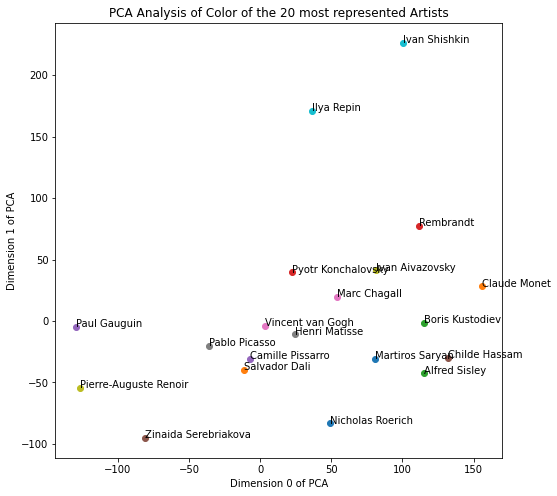

In [96]:
from collections import Counter
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
most_common = Counter(labels).most_common(20)

for k, _ in most_common:
    x = matrix_red[labels == k, 0].mean()
    y = matrix_red[labels == k, 1].mean()
    axs.scatter(x, y, label=k)
    axs.text(x + 0.002, y + 0.002, s=k, ha="left")

plt.xlabel("Dimension 0 of PCA")
plt.ylabel("Dimension 1 of PCA")
plt.title("PCA Analysis of Color of the 20 most represented Artists")
plt.savefig("aggregate_color_pca.pdf")
plt.show()


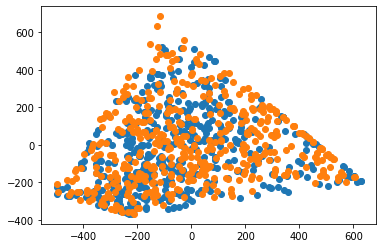

In [68]:
plt.scatter(matrix_red[labels == "Pablo Picasso", 0], matrix_red[labels == "Pablo Picasso", 1])
plt.scatter(matrix_red[labels == "Vincent van Gogh", 0], matrix_red[labels == "Vincent van Gogh", 1])


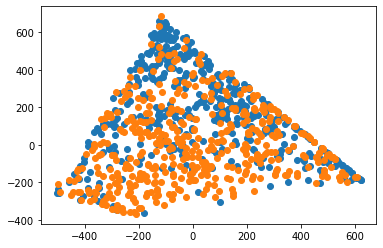

In [69]:
plt.scatter(matrix_red[labels == "Ilya Repin", 0], matrix_red[labels == "Ilya Repin", 1])
plt.scatter(matrix_red[labels == "Vincent van Gogh", 0], matrix_red[labels == "Vincent van Gogh", 1])
